In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import curve_fit

In [8]:
data = pd.read_csv('~/Downloads/test_results.csv')

In [9]:
data['Pruning Amount'] = data['Pruning Amount'].astype(float)
data['Pre-Acc'] = data['Pre-Acc'].astype(float)
data['Post-Acc'] = data['Post-Acc'].astype(float)
data['Comp Time'] = data['Comp Time'].astype(float)
data['Model Size'] = data['Model Size'].astype(float)

In [10]:
data

,Pruning Amount,Pre-Acc,Post-Acc,Comp Time,Model Size
0,0.0,65.766129,73.620072,1.419811,491.720341
1,1.0,65.658602,74.560932,1.404317,488.705990
2,2.0,65.685484,73.942652,1.490837,482.658627
3,3.0,65.568996,73.875448,1.432505,475.268261
4,4.0,65.277778,73.637993,1.444663,470.494106
...,...,...,...,...,...
93,93.0,32.898746,70.873656,0.084116,89.225956
94,94.0,24.372760,71.935484,0.078861,89.196568
95,95.0,4.444444,68.472222,0.070141,92.213608
96,96.0,5.304659,66.034946,0.056068,79.923027


In [11]:
x = data['Pruning Amount']
y = data['Post-Acc']

In [12]:
x1, y1 = x[:20], y[:20]
x2, y2 = x[20:70], y[20:70]
x3, y3 = x[70:80], y[70:80]
x4, y4 = x[80:], y[80:]

In [13]:
def fit_curve(x, y, n):
    coeffs = np.polyfit(x, y, n)
    poly = np.poly1d(coeffs)
    return poly(x)

[73.40682218 73.91935319 74.29316485 74.54389183 74.6871688  74.73863042
 74.71391136 74.62864628 74.49846986 74.33901677 74.16592166 73.9948192
 73.84134406 73.72113092 73.64981442 73.64302925 73.71641007 73.88559155
 74.16620835 74.57389513 74.50696019 74.43499384 74.36713477 74.30330534
 74.24342789 74.18742474 74.13521826 74.08673077 74.04188463 74.00060216
 73.96280572 73.92841764 73.89736026 73.86955594 73.844927   73.82339578
 73.80488464 73.78931591 73.77661193 73.76669505 73.7594876  73.75491193
 73.75289038 73.75334529 73.75619899 73.76137384 73.76879218 73.77837633
 73.79004866 73.80373149 73.81934717 73.83681804 73.85606644 73.87701472
 73.89958521 73.92370025 73.94928219 73.97625337 74.00453613 74.03405281
 74.06472576 74.0964773  74.12922979 74.16290557 74.19742697 74.23271634
 74.26869603 74.30528836 74.34241569 74.38000035 75.7692245  75.23305637
 74.78785163 74.4336103  74.17033236 73.99801781 73.91666667 73.92627892
 74.02685457 74.21839361 75.58285648 74.85078965 74.

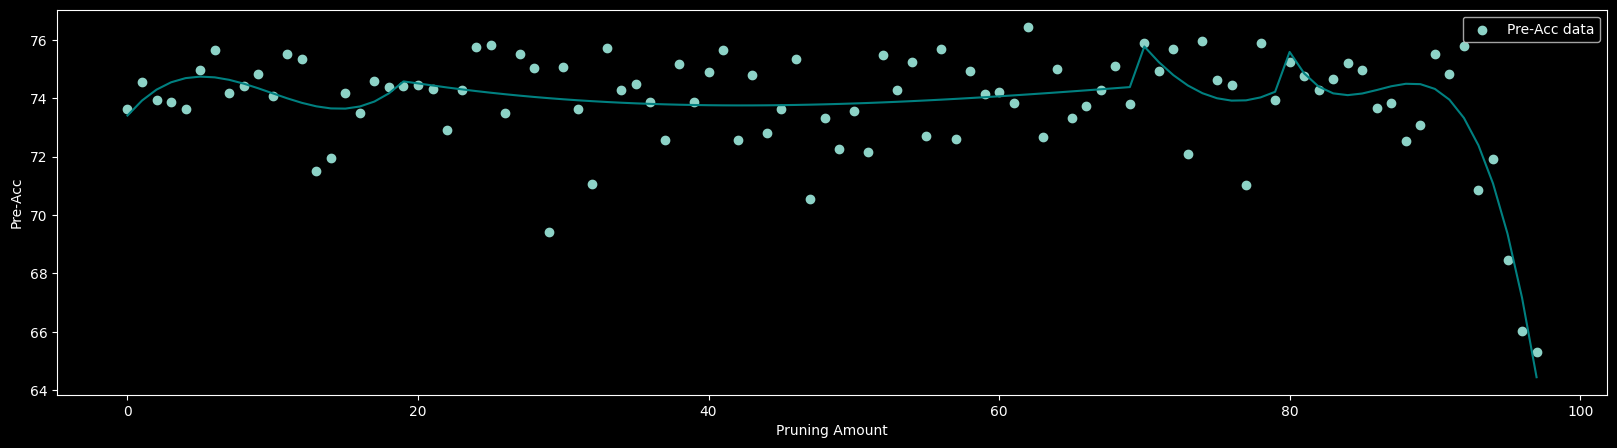

In [14]:
y_fit1 = fit_curve(x1, y1, 3)
y_fit2 = fit_curve(x2, y2, 3)
y_fit3 = fit_curve(x3, y3, 2)
y_fit4 = fit_curve(x4, y4, 3)
y_fit = np.concatenate((y_fit1, y_fit2, y_fit3, y_fit4))
print(y_fit)



plt.figure(figsize=(20, 5))
plt.scatter(x, y, label='Pre‑Acc data')
plt.plot(x, y_fit, color='teal')
plt.xlabel('Pruning Amount')
plt.ylabel('Pre‑Acc')
plt.legend()
plt.show()

In [15]:
def curve1(x):
    # y = 9.04·x⁵ − 11.10·x⁴ − 1.86·x³ + 4.13·x² − 1.17·x + 1.05
    x/=100
    y = 9.04 * x**5 - 11.10 * x**4 - 1.86 * x**3 + 4.13 * x**2 - 1.17 * x + 1.05
    y*=75
    return y

98 98


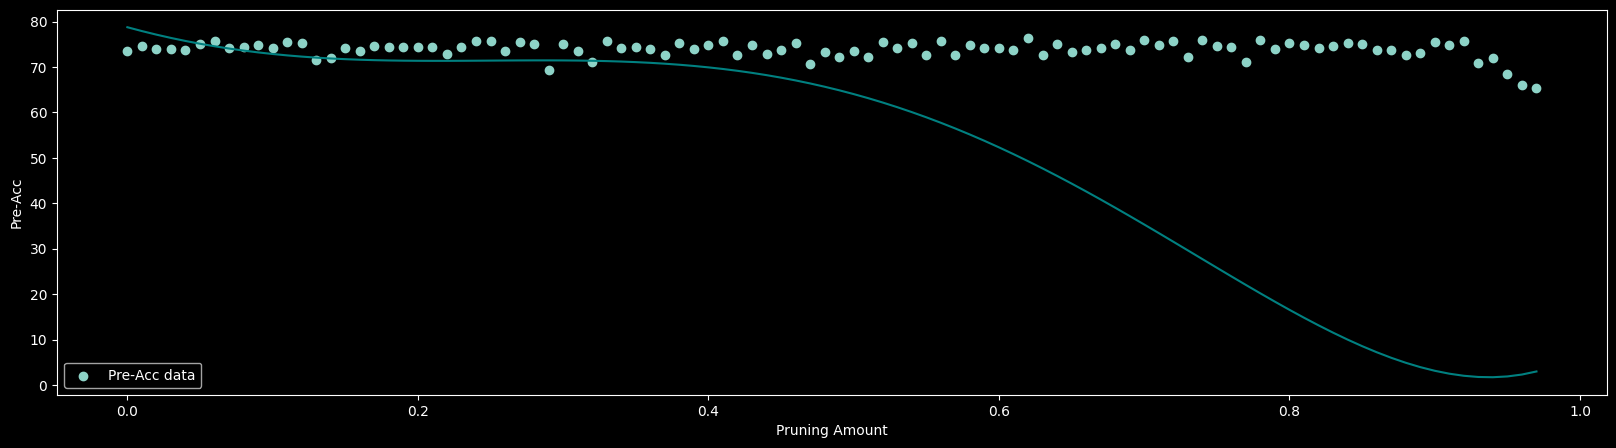

In [ ]:
x = np.arange(0, 98, 1, dtype=float)
y = curve1(x)
plt.figure(figsize=(20, 5))
plt.scatter(x, data['Post-Acc'], label='Pre‑Acc data')
plt.plot(x, y, color='teal')
plt.xlabel('Pruning Amount')
plt.ylabel('Pre‑Acc')
plt.legend()
plt.show()